## 딥러닝 구현 과제  

- 교안의 코드에서 1개의 노드를 추가하였습니다.
- 외부 데이터셋을 활용해 예측 문제를 해결하였습니다. 

Dataset: Oranges vs. Grapefruit  
Source: [Kaggle](https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit)

### 데이터셋

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("citrus.csv")
# 학습 시간 단축을 위해 30개만 활용
df_orange = df[df["name"] == "orange"][:15]
df_grape = df[df["name"] == "grapefruit"][:15]
df = pd.concat((df_orange, df_grape))

target = np.ones(30)
target[15:] = -1
df["target"] = target

# df.corr()

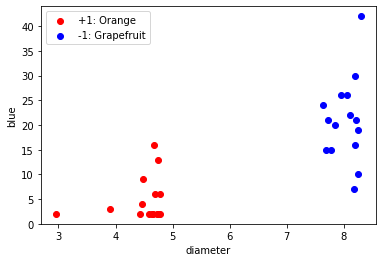

In [2]:
import matplotlib.pyplot as plt

data = df[["diameter", "blue"]].to_numpy()
labels = target

plt.scatter(data[:15, 0], data[:15, 1], color="r", label="+1: Orange")
plt.scatter(data[15:, 0], data[15:, 1], color="b", label="-1: Grapefruit")
plt.xlabel("diameter")
plt.ylabel("blue")
plt.legend()
plt.show()

### 가중치 초기화 및 업데이트

In [3]:
np.random.seed(0)

w0, w1, w2, a, b, c, d, e, f, g, h, i, j \
    = np.random.uniform(-1, 1, 13)

ETA = 0.0001
ITER = 100000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [4]:
for _ in range(ITER):
    dw2 = dw1 = dw0 = da = db = dc = dd = de = df = dg = dh = di = dj = 0
    for idx in range(len(data)):

        x = data[idx][0]
        y = data[idx][1]

        z0 = w2 * x + w1 * y + w0
        W = sigmoid(z0)
        z1 = a * x + b * y + c
        X = sigmoid(z1)
        z2 = d * x + e * y + f
        Y = sigmoid(z2)

        z = g * W + h * X + i * Y + j
        Z = labels[idx]
        
        dz = 2 * (z - Z)

        dz0 = dz * g * sigmoid(z0) * (1 - sigmoid(z0))
        dw2 += dz0 * x
        dw1 += dz0 * y
        dw0 += dz0

        dz1 = dz * h * sigmoid(z1) * (1 - sigmoid(z1))
        da += dz1 * x
        db += dz1 * y
        dc += dz1

        dz2 = dz * i * sigmoid(z2) * (1 - sigmoid(z2))
        dd += dz2 * x
        de += dz2 * y
        df += dz2

        dg += dz * W
        dh += dz * X
        di += dz * Y
        dj += dz

    w2 -= ETA * dw2
    w1 -= ETA * dw1
    w0 -= ETA * dw0
    a -= ETA * da
    b -= ETA * db
    c -= ETA * dc
    d -= ETA * dd
    e -= ETA * de
    f -= ETA * df
    g -= ETA * dg
    h -= ETA * dh
    i -= ETA * di
    j -= ETA * dj

print(
    f"w2:{w2:.2f}, w1:{w1:.2f}, w0:{w0:.2f}, a:{a:.2f}, b:{b:.2f}, c:{c:.2f}, d:{d:.2f}, e:{e:.2f}, f:{f:.2f}, g:{g:.2f}, h:{h:.2f}, i:{i:.2f}"
)

w2:0.31, w1:-0.15, w0:-0.40, a:-0.45, b:-0.12, c:4.51, d:-0.56, e:1.14, f:1.11, g:-2.38, h:3.86, i:-0.70


### 예측값 확인

In [5]:
predicted = np.zeros(len(data))

for idx in range(len(data)):
    
    x = data[idx][0]
    y = data[idx][1]

    z0 = w2 * x + w1 * y + w0
    W = sigmoid(z0)
    z1 = a * x + b * y + c
    X = sigmoid(z1)
    z2 = d * x + e * y + f
    Y = sigmoid(z2)
    
    z = g * W + h * X + i * Y + j

    predicted[idx] += z

# print(predicted)

### 예측 오차 확인

오차 = (기대값 - 예측값)**2

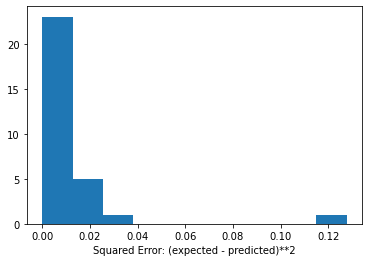

In [6]:
squared_error = np.square(labels - predicted)

plt.hist(squared_error)
plt.xlabel("Squared Error: (expected - predicted)**2")
plt.show()